**Find the types of variables in the dataset and the missing (null) ratio of each variable.**

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv("states_all.csv")

**type of variable**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

**ration of null values**

In [28]:
df.isnull().sum().sort_values(ascending = False)*100/len(df["PRIMARY_KEY"])

AVG_READING_8_SCORE             67.230321
AVG_MATH_4_SCORE                67.055394
AVG_MATH_8_SCORE                64.897959
AVG_READING_4_SCORE             62.099125
GRADES_1_8_G                    40.524781
GRADES_9_12_G                   37.551020
ENROLL                          28.629738
OTHER_EXPENDITURE               28.629738
INSTRUCTION_EXPENDITURE         25.655977
TOTAL_REVENUE                   25.655977
FEDERAL_REVENUE                 25.655977
STATE_REVENUE                   25.655977
LOCAL_REVENUE                   25.655977
TOTAL_EXPENDITURE               25.655977
CAPITAL_OUTLAY_EXPENDITURE      25.655977
SUPPORT_SERVICES_EXPENDITURE    25.655977
GRADES_PK_G                     10.087464
GRADES_KG_G                      4.839650
GRADES_4_G                       4.839650
GRADES_8_G                       4.839650
GRADES_12_G                      4.839650
GRADES_ALL_G                     4.839650
YEAR                             0.000000
STATE                            0

**(2)** You may have noticed that our data has a year column. For now, forget about the year data and assume that each  observation was made in the same year. Consider how you can fill in missing values for each variable. Filling in the missing values with a value is meaningful for which variables and for which ones?

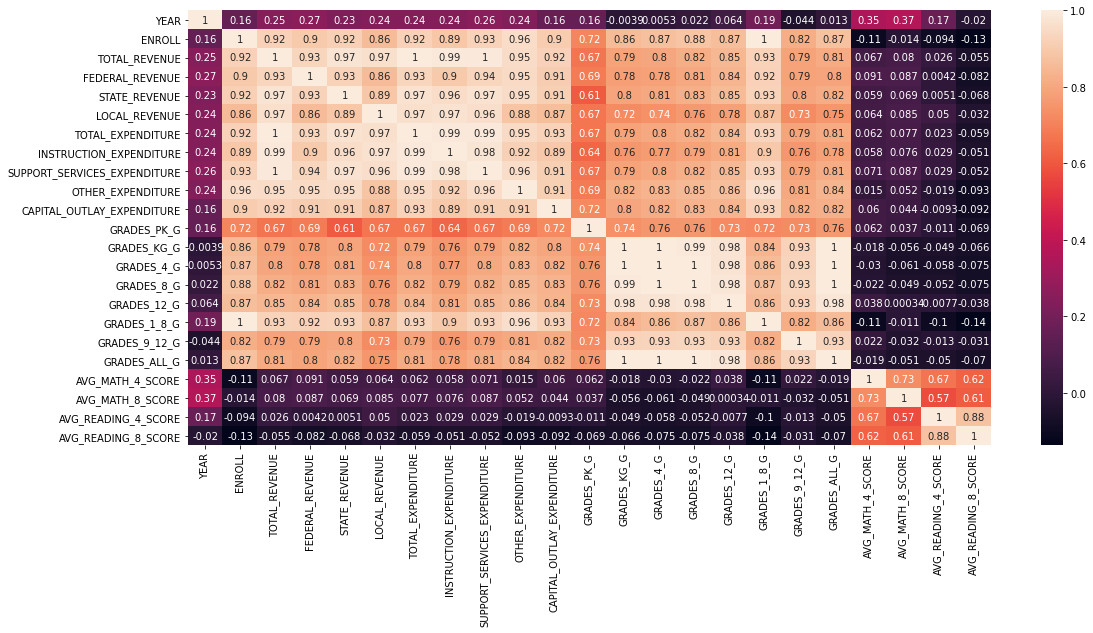

In [105]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True);

**As can be seen from correlation table except AVG_READING_8_SCORE AVG_MATH_4_SCORE AVG_MATH_8_SCOR AVG_READING_4_SCORE features other variable highly correlated with each other.** 
**And for other variable except STATE PRIMARY_KEY other features' data type is float. In addition to that there is no null values in STATE and PRIMARY_KEY columns. For the other values, they can be filled with Central Tendency measures such as mean median or mode but mode is not logical in this data.**

**(3)** Now it's time to consider the factor of time! Review your answer in question 2 and fill in the missing data based on the values observed during that year. For example, if you want to fill a value with an average value, calculate the average of that year.

In [91]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [92]:
for i in np.arange(3,len(df.columns)):
    df[df.columns[i]] = df[df.columns[i]].fillna(df.groupby('YEAR')[df.columns[i]].transform(lambda x: x.fillna(x.mean())))

**but this method is not work properly. Because there are some year that is fully empty. This means that we can not find any mean or median for this year***

**(4)** This time, fill in the missing values by interpolating.

In [102]:
for i in np.arange(3,len(df.columns)):
    df[df.columns[i]].interpolate(method ='linear', limit_direction ='forward',inplace = True)

In [103]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,211.5,258.5,208.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [104]:
df[df["YEAR"] == 2000]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
408,2000_ALABAMA,ALABAMA,2000,730184.0,4885917.0,425978.0,3003814.0,1456125.0,5003267.0,2551713.0,...,59749.0,56951.0,42512.0,472686.0,201358.0,739992.0,217.000000,264.0,214.285714,259.623377
409,2000_ALASKA,ALASKA,2000,132822.0,1313510.0,199520.0,774194.0,339796.0,1386904.0,717725.0,...,10646.0,10377.0,8335.0,83555.0,38914.0,133356.0,218.000000,266.5,214.214286,259.558442
410,2000_ARIZONA,ARIZONA,2000,814807.0,5479168.0,534619.0,2481089.0,2463460.0,5397194.0,2488932.0,...,72295.0,65526.0,49501.0,567626.0,236933.0,877696.0,219.000000,269.0,214.142857,259.493506
411,2000_ARKANSAS,ARKANSAS,2000,450751.0,2844855.0,254735.0,2126099.0,464021.0,2683400.0,1531232.0,...,35724.0,34873.0,28918.0,281091.0,131511.0,449959.0,216.000000,257.0,214.071429,259.428571
412,2000_CALIFORNIA,CALIFORNIA,2000,5941946.0,46628207.0,4024940.0,26877920.0,15725347.0,45829753.0,23514388.0,...,489043.0,441877.0,357789.0,3804640.0,1707952.0,6140814.0,213.000000,260.0,214.000000,259.363636
413,2000_COLORADO,COLORADO,2000,707436.0,5073266.0,266207.0,2083318.0,2723741.0,5444193.0,2539372.0,...,57056.0,55384.0,43502.0,450150.0,207942.0,724508.0,223.500000,270.5,213.928571,259.298701
414,2000_CONNECTICUT,CONNECTICUT,2000,530363.0,5884078.0,234321.0,2298931.0,3350826.0,5605280.0,3189123.0,...,44682.0,42597.0,32591.0,354391.0,155734.0,562179.0,234.000000,281.0,213.857143,259.233766
415,2000_DELAWARE,DELAWARE,2000,112743.0,1098555.0,69540.0,716375.0,312640.0,1040480.0,571982.0,...,8848.0,9075.0,7104.0,72404.0,33875.0,114676.0,213.000000,258.0,213.785714,259.168831
416,2000_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2000,70762.0,881423.0,184825.0,0.0,696598.0,858807.0,318260.0,...,5830.0,3371.0,2785.0,41330.0,13781.0,68925.0,192.000000,235.0,213.714286,259.103896
417,2000_FLORIDA,FLORIDA,2000,2377271.0,17558787.0,1398757.0,8804217.0,7355813.0,17180954.0,7751117.0,...,194320.0,185663.0,119809.0,1528970.0,674919.0,2434821.0,205.500000,250.0,213.642857,259.038961


In [44]:
df[~df["ENROLL"].isnull()]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
51,1993_ALABAMA,ALABAMA,1993,727716.0,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,...,57497.0,60004.0,39900.0,NaN,NaN,734288.0,NaN,NaN,NaN,NaN
52,1993_ALASKA,ALASKA,1993,121156.0,1191398.0,176150.0,775829.0,239419.0,1126398.0,494917.0,...,10156.0,9160.0,6975.0,NaN,NaN,125948.0,NaN,NaN,NaN,NaN
53,1993_ARIZONA,ARIZONA,1993,676297.0,3427976.0,318465.0,1415407.0,1694104.0,3623946.0,1578889.0,...,57701.0,53500.0,37614.0,NaN,NaN,709453.0,NaN,NaN,NaN,NaN
54,1993_ARKANSAS,ARKANSAS,1993,311432.0,1346909.0,128196.0,771079.0,447634.0,1376067.0,782791.0,...,34255.0,36471.0,27169.0,NaN,NaN,444271.0,NaN,NaN,NaN,NaN
55,1993_CALIFORNIA,CALIFORNIA,1993,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,...,420233.0,380223.0,277271.0,NaN,NaN,5327231.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,2016_VIRGINIA,VIRGINIA,2016,1283493.0,16259274.0,1058146.0,6297587.0,8903541.0,16497520.0,8944614.0,...,99258.0,95234.0,90500.0,773615.0,389330.0,1287026.0,NaN,NaN,NaN,NaN
1271,2016_WASHINGTON,WASHINGTON,2016,1083973.0,14964364.0,1097684.0,9211201.0,4655479.0,15253296.0,7087365.0,...,86114.0,81039.0,90645.0,667327.0,339349.0,1101711.0,NaN,NaN,NaN,NaN
1272,2016_WEST_VIRGINIA,WEST_VIRGINIA,2016,276764.0,3391579.0,358068.0,1863062.0,1170449.0,3366566.0,1804235.0,...,20324.0,19931.0,18155.0,159595.0,79442.0,273855.0,NaN,NaN,NaN,NaN
1273,2016_WISCONSIN,WISCONSIN,2016,857736.0,11697466.0,782610.0,5986763.0,4928093.0,11787535.0,5760418.0,...,62408.0,61432.0,66303.0,488983.0,262681.0,864432.0,NaN,NaN,NaN,NaN
